# Import libraries

In [5]:
import numpy as np
np.random.seed(1000)

import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image
import keras
os.environ['KERAS_BACKEND'] = 'tensorflow'

In [6]:
!git clone https://github.com/abdullah624/ML-Lab-Assignments.git

fatal: destination path 'ML-Lab-Assignments' already exists and is not an empty directory.


In [7]:
cnn_dataset_dir = "/content/ML-Lab-Assignments/Final Assignments/Problem-1/CNN_dataset"
# ['HeadCT', 'ChestCT', 'AbdomenCT', 'Hand', 'CXR']
SIZE = 64
dataset = []
label = []

In [8]:
AbdomenCT_img = os.listdir(cnn_dataset_dir + '/AbdomenCT/')
for i, image_name in enumerate(AbdomenCT_img):  
    
    if (image_name.split('.')[1] == 'jpeg'):
        image = cv2.imread(cnn_dataset_dir + '/AbdomenCT/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)

In [9]:
CXR_img = os.listdir(cnn_dataset_dir + '/CXR/')
for i, image_name in enumerate(CXR_img):  
    
    if (image_name.split('.')[1] == 'jpeg'):
        image = cv2.imread(cnn_dataset_dir + '/CXR/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)

In [10]:
ChestCT_img = os.listdir(cnn_dataset_dir + '/ChestCT/')
for i, image_name in enumerate(ChestCT_img):  
    
    if (image_name.split('.')[1] == 'jpeg'):
        image = cv2.imread(cnn_dataset_dir + '/ChestCT/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(2)

In [11]:
Hand_img = os.listdir(cnn_dataset_dir + '/Hand/')
for i, image_name in enumerate(Hand_img):  
    
    if (image_name.split('.')[1] == 'jpeg'):
        image = cv2.imread(cnn_dataset_dir + '/Hand/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(3)

In [12]:
HeadCT_img = os.listdir(cnn_dataset_dir + '/HeadCT/')
for i, image_name in enumerate(HeadCT_img):  
    
    if (image_name.split('.')[1] == 'jpeg'):
        image = cv2.imread(cnn_dataset_dir + '/HeadCT/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(4)

In [13]:
print(len(AbdomenCT_img))
print(len(CXR_img))
print(len(ChestCT_img))
print(len(Hand_img))
print(len(HeadCT_img))

10000
10000
10000
10000
10000


# Fit Model

In [14]:
INPUT_SHAPE = (SIZE, SIZE, 3)
inp = keras.layers.Input(shape=INPUT_SHAPE)

conv1 = keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')(inp)
pool1 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)
norm1 = keras.layers.BatchNormalization(axis = -1)(pool1)
drop1 = keras.layers.Dropout(rate=0.2)(norm1)

conv2 = keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')(drop1)
pool2 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)
norm2 = keras.layers.BatchNormalization(axis = -1)(pool2)
drop2 = keras.layers.Dropout(rate=0.2)(norm2)

flat = keras.layers.Flatten()(drop2)

hidden1 = keras.layers.Dense(512, activation='relu')(flat)
norm3 = keras.layers.BatchNormalization(axis = -1)(hidden1)
drop3 = keras.layers.Dropout(rate=0.2)(norm3)
hidden2 = keras.layers.Dense(256, activation='relu')(drop3)
norm4 = keras.layers.BatchNormalization(axis = -1)(hidden2)
drop4 = keras.layers.Dropout(rate=0.2)(norm4)

out = keras.layers.Dense(5, activation='softmax')(drop4)

In [15]:
model = keras.Model(inputs=inp, outputs=out)

In [16]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248  

In [17]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

x_train, x_test, y_train, y_test = train_test_split(dataset, to_categorical(np.array(label)), test_size = 0.20, random_state = 0)

In [18]:
history = model.fit(np.array(x_train), y_train, batch_size = 64, verbose = 1, epochs = 15, validation_split = 0.1, shuffle = False )

Epoch 1/15
563/563 [==============================] - 20s 12ms/step - loss: 0.0239 - accuracy: 0.9924 - val_loss: 0.5569 - val_accuracy: 0.8105
Epoch 2/15
563/563 [==============================] - 6s 12ms/step - loss: 0.0034 - accuracy: 0.9989 - val_loss: 0.0047 - val_accuracy: 0.9990
Epoch 3/15
563/563 [==============================] - 6s 11ms/step - loss: 0.0035 - accuracy: 0.9987 - val_loss: 0.0862 - val_accuracy: 0.9607
Epoch 4/15
563/563 [==============================] - 7s 12ms/step - loss: 0.0031 - accuracy: 0.9987 - val_loss: 0.0029 - val_accuracy: 0.9992
Epoch 5/15
563/563 [==============================] - 6s 11ms/step - loss: 0.0032 - accuracy: 0.9989 - val_loss: 0.0087 - val_accuracy: 0.9980
Epoch 6/15
563/563 [==============================] - 7s 12ms/step - loss: 0.0014 - accuracy: 0.9996 - val_loss: 7.5944e-04 - val_accuracy: 0.9998
Epoch 7/15
563/563 [==============================] - 6s 11ms/step - loss: 0.0032 - accuracy: 0.9989 - val_loss: 6.3586e-04 - val_accurac

In [19]:
print("Test_Accuracy: {:.2f}%".format(model.evaluate(np.array(x_test), np.array(y_test))[1]*100))

313/313 [==============================] - 1s 4ms/step - loss: 7.1738e-04 - accuracy: 0.9998
Test_Accuracy: 99.98%


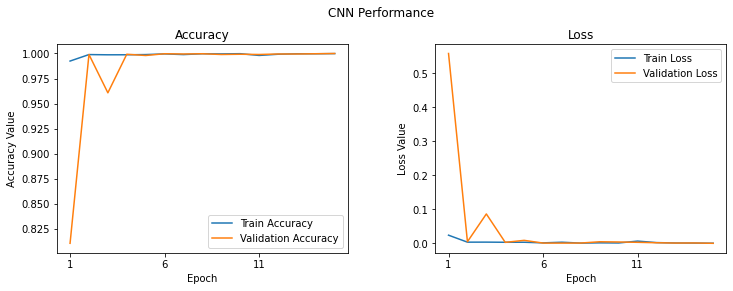

In [20]:
f, (axis1, axis2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(history.history['accuracy'])+1
epoch_list = list(range(1,max_epoch))
axis1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
axis1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
axis1.set_xticks(np.arange(1, max_epoch, 5))
axis1.set_ylabel('Accuracy Value')
axis1.set_xlabel('Epoch')
axis1.set_title('Accuracy')
l1 = axis1.legend(loc="best")

axis2.plot(epoch_list, history.history['loss'], label='Train Loss')
axis2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
axis2.set_xticks(np.arange(1, max_epoch, 5))
axis2.set_ylabel('Loss Value')
axis2.set_xlabel('Epoch')
axis2.set_title('Loss')
l2 = axis2.legend(loc="best")